# Geopandas demo

In [1]:
# imports
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the data.

All the robot data is from [a 2017 study on industrial robots](https://www.brookings.edu/blog/the-avenue/2017/08/14/where-the-robots-are/).

In [43]:
robots = pd.read_csv('robots.csv')
robots_metro = pd.read_csv('robots_metro.csv')

Import the state shapefiles (from [the US Census site](https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html)).

In [44]:
states = gpd.read_file('cb_2017_us_state_500k')

Combine the `robots` dataframe with the 'NAME' and 'geometry' columns of `states`.

In [3]:
robot_states = pd.merge(states[['NAME','geometry']], robots, left_on='NAME', right_on='State').drop('NAME', 1)

Dropping Alaska and Hawaii for aesthetic reasons.

In [4]:
robot_states = robot_states.set_index('State').drop(['Alaska','Hawaii']).reset_index()

Here's how it looks.

In [5]:
robot_states.head()

,State,geometry,Robots_2015
0,West Virginia,"POLYGON ((-82.6431981036679 38.1690897960737, ...",751
1,Illinois,"POLYGON ((-91.512974 40.181062, -91.511073 40....",10519
2,Maryland,"(POLYGON ((-76.05015299999999 37.986905, -76.0...",1234
3,Idaho,"POLYGON ((-117.242675 44.396548, -117.234835 4...",958
4,Vermont,"POLYGON ((-73.43773999999999 44.045006, -73.43...",412


Geopandas dataframes have a `.plot()` method just like pandas dataframes, except geopandas outputs a map.

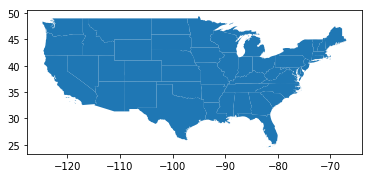

In [46]:
robot_states.plot();

Adjust the map with params like `figsize`, `edgecolor` and `color`.

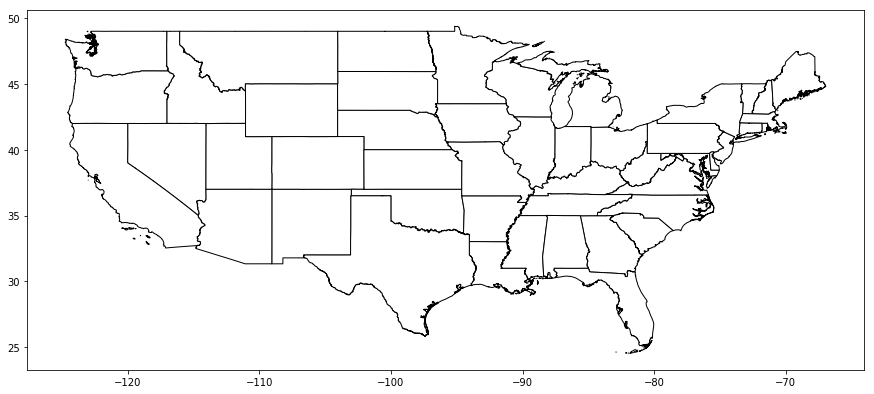

In [47]:
robot_states.plot(figsize=(15,7), edgecolor='black', color='white');

Best of all, give `.plot()` a numerical column in the `column` parameter and geopandas will automatically color every geometry entry.

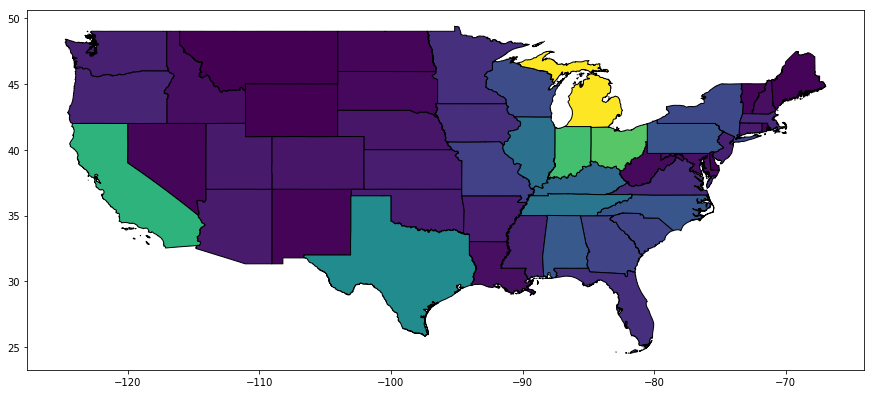

In [49]:
robot_states.plot(figsize=(15,7), edgecolor='black', column='Robots_2015');

Specify a colormap with `cmap`. ([Here's a reference page for colormaps included with matplotlib.](https://matplotlib.org/examples/color/colormaps_reference.html))

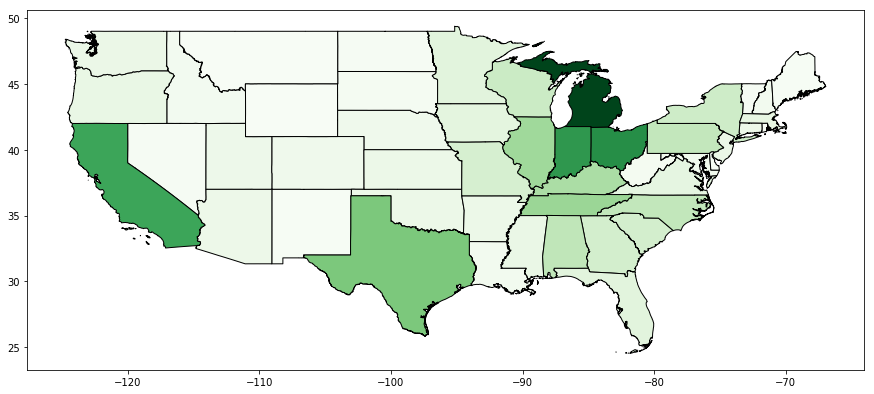

In [50]:
robot_states.plot(figsize=(15,7), edgecolor='black', column='Robots_2015', cmap='Greens');

Finish it off with a color bar (`legend = True`), add a title and turn off the axes.

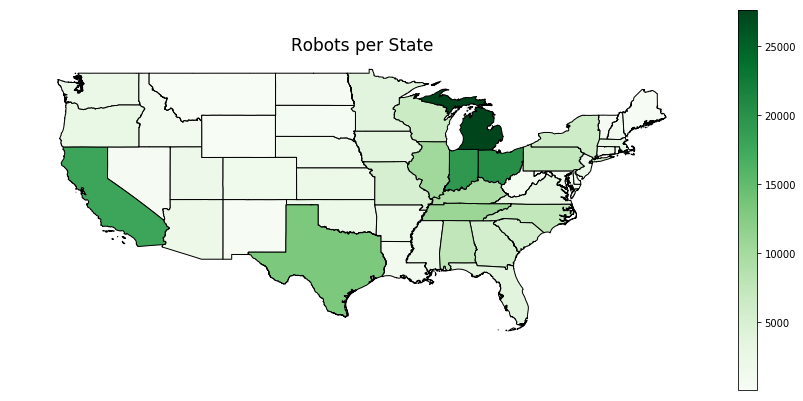

In [54]:
robot_states.plot(figsize=(15,7), edgecolor='black', cmap='Greens', column='Robots_2015', legend=True)
plt.title('Robots per State', size='17')
plt.axis('off');

### Adding points to a map with Geopandas

Bring up the basic black state outline.

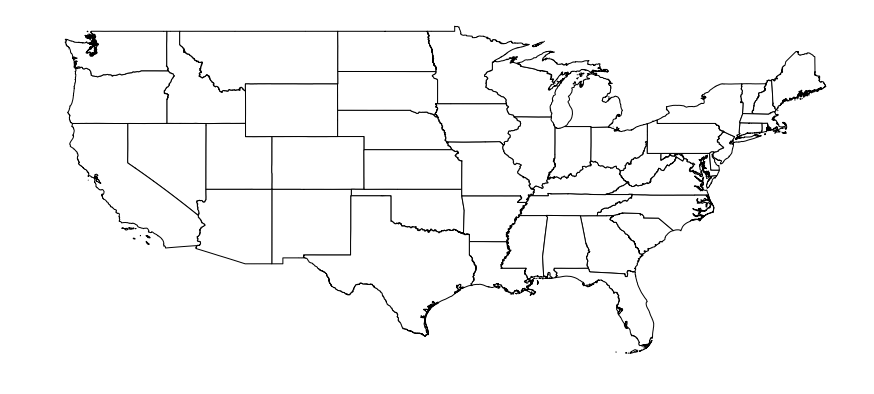

In [56]:
robot_states.plot(figsize=(15,7), edgecolor='black', color='white')
plt.axis('off');

Take a look at `robots_metro`.

In [58]:
robots_metro.head(10)

,Metro_area,Robots_2015,lat,lon
0,"Detroit-Warren-Dearborn, MI",15115,42.322260,-83.176315
1,"Chicago-Naperville-Elgin, IL-IN-WI",6173,44.430898,-89.688464
2,"Los Angeles-Long Beach-Anaheim, CA",6083,33.834752,-117.911732
3,"Dallas-Fort Worth-Arlington, TX",4837,32.701939,-97.105625
4,"Elkhart-Goshen, IN",4355,41.582409,-85.834366
5,"San Jose-Sunnyvale-Santa Clara, CA",3427,37.354113,-121.955174
6,"Grand Rapids-Wyoming, MI",3102,43.170026,-107.568535
7,"Houston-The Woodlands-Sugar Land, TX",2596,29.619679,-95.634946
8,"Cleveland-Elyria, OH",2530,41.368251,-82.106576
9,"Boston-Cambridge-Newton, MA-NH",2467,43.484913,-71.655399


Add a scatter plot of `lat` and `lon` on top of the state map. Easy!

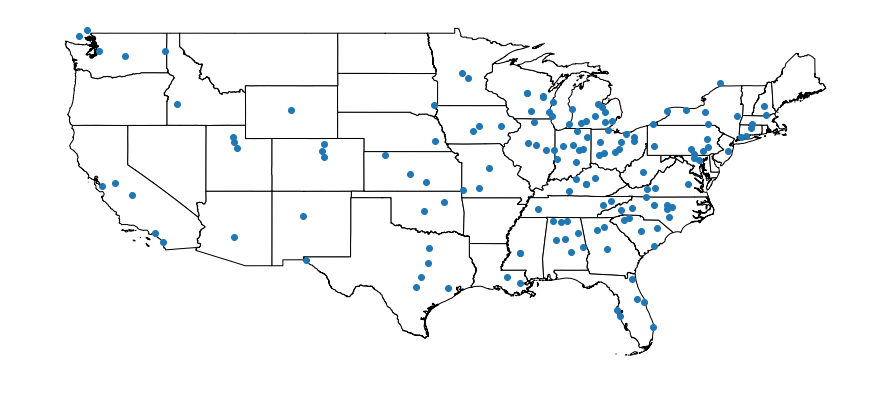

In [59]:
robot_states.plot(figsize=(15,7), edgecolor='black', color='white')
plt.scatter(data=robots_metro, x='lon', y='lat')
plt.axis('off');

Set `s` param in `plt.scatter` to a column in the data and the point size changes accordingly.

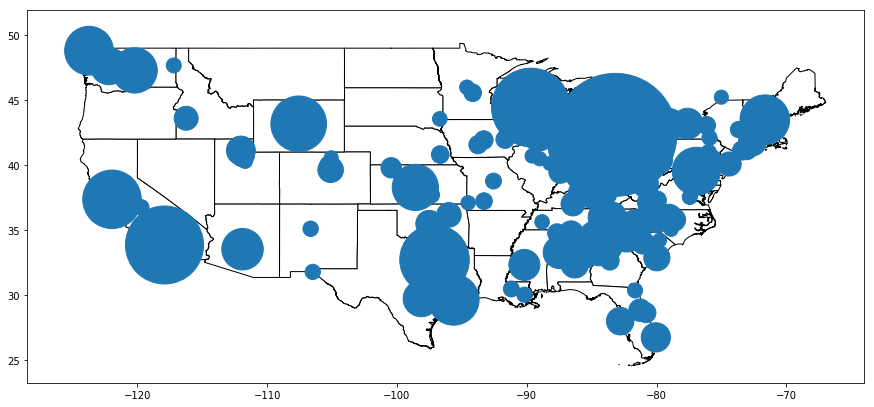

In [62]:
d = robots_metro

robot_states.plot(figsize=(15,7), edgecolor='black', color='white')
plt.scatter(data=d, x='lon', y='lat', s='Robots_2015');

OK that's too big. Setting `s` to `d['Robots_2015]/4` makes the size more reasonable.

Setting `alpha` adjusts transparency.

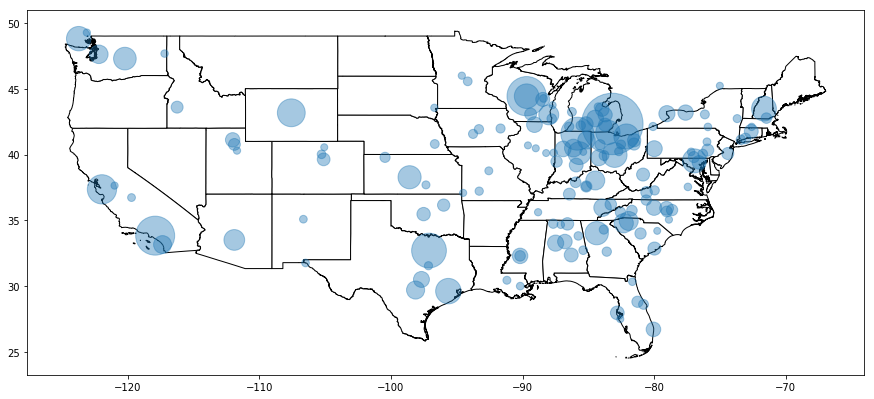

In [63]:
d = robots_metro

robot_states.plot(figsize=(15,7), edgecolor='black', color='white')
plt.scatter(data=d, x='lon', y='lat', s=d['Robots_2015']/4, alpha=0.4);

You can set point color the same way.

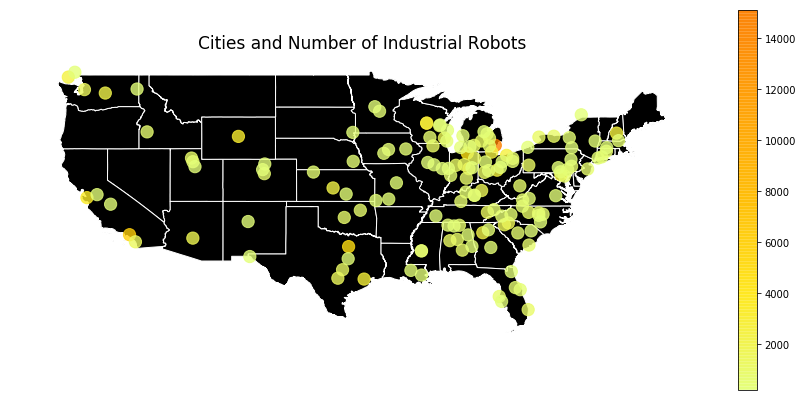

In [80]:
d = robots_metro

robot_states.plot(figsize=(15,7), edgecolor='white', color='black')
plt.scatter(data=d, x='lon', y='lat', s=150, cmap='Wistia', c='Robots_2015', alpha=0.8)
plt.colorbar()
plt.axis('off')
plt.title('Cities and Number of Industrial Robots', size='17');